
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: **Chandler de Spirlet**

***

This assignment is due on Moodle by **11:59 PM on Friday 3 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>


### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

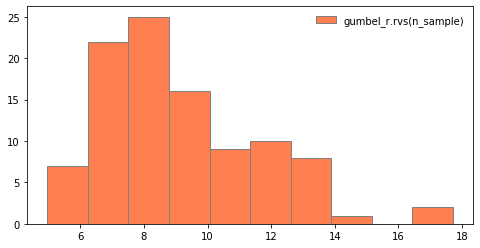

In [10]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax.hist(x, color='coral', edgecolor='gray', label='gumbel_r.rvs(n_sample)')
ax.legend(loc='best', frameon=False)
plt.show()


**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

$\text{Analytical mean:}$
$$ = \mu + e\beta $$
$$ = 8 + 0.577216(2) $$
$$ = 9.154431$$
$\text{Analytical variance:}$
$$ = \sigma^2$$
$$ \sigma = \frac{\beta \pi}{\sqrt{6}}$$
$$ = {\frac{\beta \pi}{\sqrt{6}}}^2 $$
$$ = 6.579736 $$
$\text{Confidence interval:}$
$$[\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\text{ }\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}]$$
$$[9.154431 - 1.959964(\frac{\sqrt{\sigma^2}}{\sqrt{n}}, \text{ }9.154431 + 1.959964(\frac{\sqrt{\sigma^2}}{\sqrt{n}}]$$
$$ = [8.651681, 9.657182]$$

In [11]:
print('e = {}'.format(np.euler_gamma))
print('Analytical mean = {}'.format(8 + (np.euler_gamma * 2)))
print('Analytical variance = {}'.format(((2 * np.pi) / (6 ** 0.5)) ** 2))
print('------ Confidence Interval ------')
mean, variance = stats.gumbel_r.stats(loc=mu, scale=beta, moments='mv')
print('Empirical mean = {}'.format(mean))
print('True variance = {}'.format(variance))
print('z_alpha/2 = {}'.format(stats.norm.ppf(1 - (0.05 / 2))))
print('[{}, {}]'.format((mean - ((stats.norm.ppf(1 - (0.05 / 2))) * ((variance ** 0.5) / (n_sample ** 0.5) ))), (mean + ((stats.norm.ppf(1 - (0.05 / 2))) * ((variance ** 0.5) / (n_sample ** 0.5) )))))

e = 0.5772156649015329
Analytical mean = 9.154431329803066
Analytical variance = 6.579736267392906
------ Confidence Interval ------
Empirical mean = 9.154431329803066
True variance = 6.579736267392906
z_alpha/2 = 1.959963984540054
[8.651681034704023, 9.657181624902108]


**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

**(i)** We could say that in repeated sampling, 95% of CIs obtained from sampling would contain the true mean, the other 5% would not.

**(ii)** This is true. In repeated sampling (100 student samples), we could say that 95% of the CIs would contain the true mean, the other 5% would not. 

**(iii)** This is true. The midpoint of the distribution would be random, however, the width of the CI is not random, that is determined by the Z value and the mu and beta values. 

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

334 out of 500 intervals contained the true mean. This is a 0.668% proportion


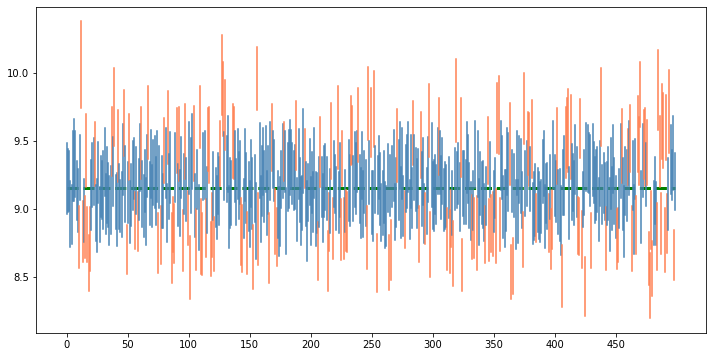

In [19]:
# GIVEN CODE:

def confidence_intervals(m=500, n=100):
    true_mean_counter = 0
    mu = 8
    beta = 2
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    # Your code goes here!
    # Get the true mean and variance of the distribution 
    mean, variance = stats.gumbel_r.stats(loc=mu, scale=beta, moments='mv')
    
    ax.plot([0,m - 1], [mean, mean], color="green", ls='--', lw=3)
    
    # Draw 20 independent samples of size n 
    alpha = 0.34
    for sId in range(m):
        # Draw samples from Weibull distribution 
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        xbar = np.mean(x) 
        z_alpha = stats.norm.ppf(1-alpha/2)
        SE = np.std(x)/np.sqrt(n)
        CImin = xbar-z_alpha*SE 
        CImax = xbar+z_alpha*SE 
        if ((CImin <= mean) and (CImax >= mean)):
            true_mean_counter += 1
            ax.plot([sId, sId], [CImin, CImax], color='steelblue')
        else:
            ax.plot([sId, sId], [CImin, CImax], color='coral')
        
    ax.xaxis.set_ticks(np.arange(0, m, 50))
    print('{} out of {} intervals contained the true mean. This is a {}% proportion'.format(true_mean_counter, m, (true_mean_counter / m)))
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

The current proportion of confidence intervals that cover the true mean of the distribution. Over a large number of random samples, the true mean is found within 66% of the samples.

---


### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

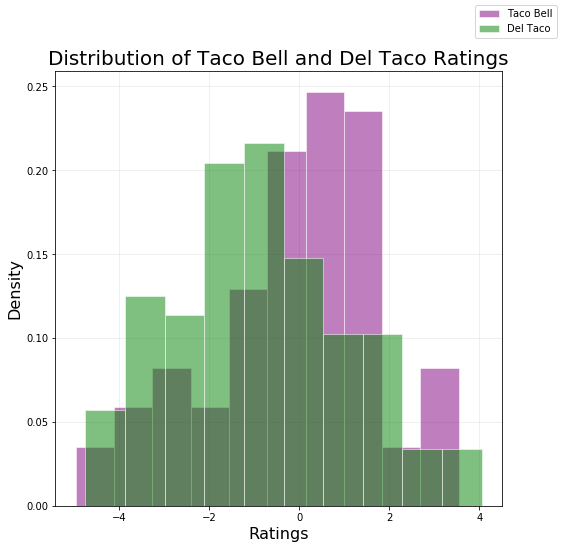

In [2]:
df = pd.read_csv('taco_time.csv')
# Initialize figure subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
# --------------------------------------
# Plot histogram for Niwot on Top 
# --------------------------------------
df.hist(column="Taco Bell", ax=axes, facecolor="purple", edgecolor="white", density=True, label='Taco Bell', alpha=0.5)
df.hist(column="Del Taco", ax=axes, facecolor="green", edgecolor="white", density=True, label='Del Taco', alpha=0.5)                                                     
# Add titles and labels 
axes.set_title("Distribution of Taco Bell and Del Taco Ratings", fontsize=20)
axes.set_xlabel("Ratings", fontsize=16)
axes.set_ylabel("Density", fontsize=16)

# Make grid lighter and set behind data
axes.grid(alpha=0.25)
axes.set_axisbelow(True)
                                                   
fig.subplots_adjust(hspace=.5)
fig.legend(loc='upper right')

Based on the rating density distribution, I would estimate that Taco Bell has a higher mean meal enjoyment based on the fact that the Taco Bell graph is right skewed.

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

$\text{Confidence interval of Taco Bell:}$
$$[\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\text{ }\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}]$$
$$[-0.113692 - 1.959964(\frac{1.882502}{\sqrt{100}}), \text{ }-0.113692 + 1.959964(\frac{1.882502}{\sqrt{100}})]$$
$$ = [-0.482655, 0.255272]$$
$\text{Confidence interval of Del Taco:}$
$$[\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\text{ }\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}]$$
$$[-0.834347 - 1.959964(\frac{1.909650}{\sqrt{n}}), \text{ }-0.834347 + 1.959964(\frac{1.909650}{\sqrt{n}})]$$
$$ = [-1.208632, -0.460063]$$
We cannot confirm that, at the 95% confidence interval, that the means are different because there is some overlap in the intervals.

In [50]:
print('------ Confidence Interval Data------')
print('Del Taco mean = {}'.format(df["Del Taco"].mean()))
print('Taco Bell mean = {}'.format(df["Taco Bell"].mean()))
print('Del Taco standard deviation = {}'.format(df['Del Taco'].std()))
print('Taco Bell standard deviation = {}'.format(df['Taco Bell'].std()))
print('z_alpha/2 = {}'.format(stats.norm.ppf(1 - (0.05 / 2))))

print('------ Confidence Interval Python------')
n_tb=len(df['Taco Bell'])
n_dt = len(df['Del Taco'])
xbar_tb=np.sum(df['Taco Bell'])/n_tb
xbar_dt = np.sum(df['Del Taco']) / n_dt
svar_tb=np.sum((xi-xbar_tb)**2/(n_tb-1) for xi in df['Taco Bell'])
svar_dt=np.sum((xi-xbar_dt)**2/(n_dt-1) for xi in df['Del Taco'])
sd_dt=np.sqrt(svar_dt)
sd_tb=np.sqrt(svar_tb)
print('Taco Bell 95% confidence interval: {}'.format(stats.norm.interval(.95, loc=xbar_tb, scale=sd_tb/np.sqrt(n_tb))))
print('Del Taco 95% confidence interval: {}'.format(stats.norm.interval(.95, loc=xbar_dt, scale=sd_dt/np.sqrt(n_dt))))

------ Confidence Interval Data------
Del Taco mean = -0.8343471961220464
Taco Bell mean = -0.11369182761474
Del Taco standard deviation = 1.9096501965979529
Taco Bell standard deviation = 1.8825017217657933
z_alpha/2 = 1.959963984540054
------ Confidence Interval Python------
Taco Bell 95% confidence interval: (-0.4826553851642996, 0.2552717299348196)
Del Taco 95% confidence interval: (-1.2086317569622285, -0.4600626352818643)


/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

$\text{CI for difference Taco Bell - Del Taco:}$
$$(\bar{x} - \bar{y}) \pm z_{\alpha/2} * \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$
$$(-0.113692 - -0.834347) \pm 1.959964 * \sqrt{\frac{1.882502^2}{100} + \frac{1.909650^2}{100}}$$
$$[0.195086, 1.246225]$$

In [12]:
mean = xbar_tb - xbar_dt
square_root = np.sqrt((sd_tb ** 2 / 100) + (sd_dt ** 2 / 100))
print('Taco Bell - Del Taco 95% confidence interval: {}'.format(stats.norm.interval(.95, loc=mean, scale = square_root)))

Taco Bell - Del Taco 95% confidence interval: (0.19508611590308955, 1.2462246211115233)


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

The results of two-sample CI are on a completely positive interval whereas the seperate one-sample CIs are both negative and positive. This indicates that, because the two-sample CI is positive, that there is a difference in the two means. This would indicate that Taco Bell has a higher meal satisfaction, which matches my hypothesis.

---


### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [5]:
dfMPG = pd.read_csv('auto-mpg.data', delimiter='\s+', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']) # TODO - need extra arguments to read correctly
# More processing code should go here!
dfMPG['horsepower'] = dfMPG['horsepower'].str.replace(r'?', '', regex=True)
dfMPG['horsepower'].replace('', np.nan, inplace=True)
dfMPG.dropna(subset=['horsepower'], inplace=True)
dfMPG['horsepower'] = dfMPG['horsepower'].astype(float)
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 



$\text{Confidence interval of mpg:}$
$$[\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\text{ }\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}]$$
$$[23.445918 - 1.644854(\frac{7.805007}{\sqrt{392}}), \text{ }23.445918 + 1.644854(\frac{7.805007}{\sqrt{392}})]$$
$$ = [22.797497, 24.094340]$$
We can conclude that, during repeated sampling, at least 95% of the samples show that the mean is between 22.797497 and 24.094340 mpg, which is greater than 20.

In [6]:
print('------ Confidence Interval Data------')
print('MPG mean = {}'.format(dfMPG["mpg"].mean()))
print('MPG standard deviation = {}'.format(dfMPG['mpg'].std()))
print('size of MPG = {}'.format(len(dfMPG)))
print('z_alpha/2 = {}'.format(stats.norm.ppf(1 - (0.1 / 2))))
print('MPG 95% confidence interval: {}'.format(stats.norm.interval(.90, loc=(dfMPG['mpg'].mean()), scale=dfMPG['mpg'].std()/np.sqrt(len(dfMPG)))))

------ Confidence Interval Data------
MPG mean = 23.445918367346938
MPG standard deviation = 7.8050074865717995
size of MPG = 392
z_alpha/2 = 1.6448536269514722
MPG 95% confidence interval: (22.79749665720537, 24.094340077488503)


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

$H_0$ = mean gas $mileage_{4 - 6 cyl}$ > 10 for $mpg_{8 cyl}$
$$ $$
$H_1$ = mean gas $mileage_{4 - 6 cyl}$ !> 10 for $mpg_{8 cyl}$
$$\alpha = 0.01, z_{critical} = -2.326348$$
$$mean_{4 to 6} = 26.543617, mean_{8} = 14.963107$$
$$z_{stat} = \frac{14.963107 - 26.543617}{\frac{6.696557}{\sqrt{392}}} = -34.238848$$
Since $z_{stat} \lt z_{crit}$, we reject the null hypothesis 

In [23]:
z_crit = stats.norm.ppf(0.01)
print('z_crit = {}'.format(z_crit))
cyl4 = dfMPG["cylinders"]
res = []
ser = []
for x in cyl4:
    res.append(x)
mpg4 = dfMPG["mpg"]
for y in mpg4:
    ser.append(y)
result = []
eight = []
for i in range(0,len(res)):
    if ((res[i] == 4) or (res[i] == 6)):
        result.append(ser[i])
print('mean 4 to 6 is {}'.format(np.mean(result)))
print('std 4 to 6 is {}'.format(np.std(result)))
print('len of mpg list is {}'.format(len(dfMPG["mpg"])))
for i in range(0,len(res)):
    if ((res[i] == 8)):
        eight.append(ser[i])
print('mean 8 is {}'.format(np.mean(eight)))
print('z_stat = {}'.format((14.963107 - 26.543617) / ((6.696557) / (392 ** 0.5))))

z_crit = -2.3263478740408408
mean 4 to 6 is 26.543617021276596
std 4 to 6 is 6.696557152544801
len of mpg list is 392
mean 8 is 14.963106796116506
z_stat = -34.23884844357504


---


### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

I would rather have Type 1 error. I Type 1 error would say that the bridge is not safe, even though it actually is because the Null hypothesis is true. A type 2 error would say that the Null hypothesis is good, and the bridge is safe, when it actually is not safe. A type 1 error would prevent people from using a bridge that is potentially unsafe.

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

I would expect Amy to have conducted 980 different confidence intervals. The definition of a confidence interval says that, under repeated sampling, we would find that 95% of the CIs contained the true mean. 

In [28]:
print('Total CIs built {}'.format(931/.95))

Total CIs built 980.0


**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

I would phrase the question as so: 

Imagine you have a big mound of money, where the stack of money looks like a big mount of dirt. If I chop off 2.5% of the money off of each end, I am left with a 95% confidence interval. If I chop off 0.5% of the money off of each end, I am left with a 99% confidence interval. The 99% CI has more money left in the pile, this means that a 99% CI is wider.

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [38]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

In [40]:
stats.t.interval(0.90, len(toughness)-1, loc=np.std(toughness), scale=stats.sem(toughness))

(0.7130222985678806, 2.6278383644330137)

---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [2]:
dfSea = pd.read_csv('sealevel_keywest.csv', names=['year', 'month', 'day', 'sea level', 'decade'])
dfSea.head(7)

,year,month,day,sea level,decade
0,1913,1,20,1453,NaN
1,1913,1,21,1439,NaN
2,1913,1,22,1444,NaN
3,1913,1,23,1489,NaN
4,1913,1,24,1474,NaN
5,1913,1,25,1442,NaN
6,1913,1,26,1467,NaN


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


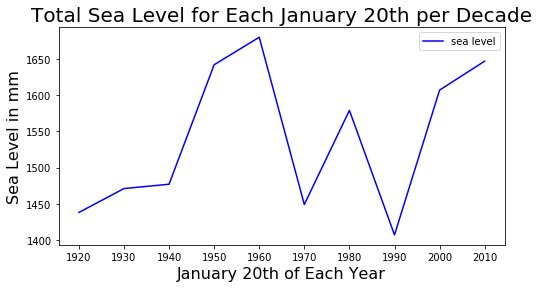

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
def assignYear(year, month, day):
    if ((year % 10 == 0) and (month == 1) and (day == 2)):
        return 1
    else: 
        return 0
for x in range(0, len(dfSea)):
    dfSea['decade'][x] = assignYear(dfSea["year"][x], dfSea['month'][x], dfSea['day'][x])
#dfSea.loc[dfSea['decade'] == 1]
dfSea.loc[dfSea['decade'] == 1].plot(kind="line", x='year', y='sea level', color='blue', ax=ax)
ax.set_xlabel("January 20th of Each Year", fontsize = 16)
ax.set_ylabel("Sea Level in mm", fontsize = 16)
ax.set_title('Total Sea Level for Each January 20th per Decade', fontsize=20)
plt.locator_params(axis='x', nbins=len(dfSea.loc[dfSea['decade'] == 1]))

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

1247


/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


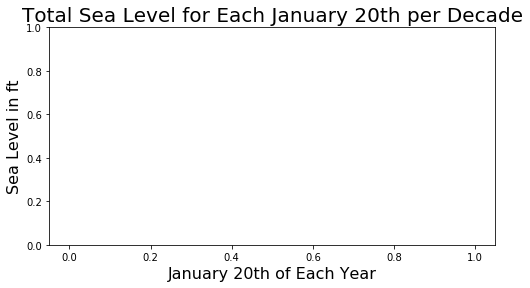

In [31]:
fig1, ax1 = plt.subplots(figsize=(8,4))
dfClean = dfSea
def convert_to_feet(mm):
    return mm * 0.00328084

dfClean = dfClean[dfClean['day'] == 2] #Remove non Jan 2nd dates
dfClean.loc[:,'sea level'] = dfClean.loc[:,'sea level'].apply(convert_to_feet) #Convert to ft
#dfClean = dfClean[dfClean['sea level'] > 0]
#print(dfClean.head())
dfClean.loc[dfClean['decade'] == 1].plot(kind="line", x='year', y='sea level', color='blue', ax=ax)
ax1.set_xlabel("January 20th of Each Year", fontsize = 16)
ax1.set_ylabel("Sea Level in ft", fontsize = 16)
ax1.set_title('Total Sea Level for Each January 20th per Decade', fontsize=20)
plt.locator_params(axis='x', nbins=len(dfClean.loc[dfClean['decade'] == 1]))


**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 